1. Attempt to compare different clustering algorithms based on how they cluster, as well as time.

- K-means
- Spectral clustering
- Mini-Batch K-means
- Gaussian mixture
- DBSCAN - although I did not teach you, it is simply a density-based that treats nearby instance as neighbors. It has two parameters (eps, min-points) that define the distance to considered as neighbors.

Attempt to play around with different parameters of each model. Last but probably the most important, interpret the result (why this algorithm works well or otherwise).  Use the dataset below.

In [3]:
from sklearn import datasets

def plot_clusters(X, y, preds, models, fit_times, title):
    fig, ax = plt.subplots(1, 6, figsize=(13, 2), sharey=True)
    ax[0].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
    ax[0].set_title("Original")
    for i, axi in enumerate(ax.flat[1:]):
        axi.scatter(X[:, 0], X[:, 1], c=preds[i], s=50, cmap='viridis')
        axi.set_xlabel(f"Fit time: {fit_times[i]:.2f}")
        axi.set_title(list(models.keys())[i])

n_samples = 1500

#noisy_circles
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

#noisy_moons
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

#normal blobs
blobs = datasets.make_blobs(n_samples=n_samples, random_state=42)

#std varied blobs
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 3.5, 0.5],
                            random_state=42)

datasets = [noisy_circles, noisy_moons, blobs, varied]
title = ['noisy circles', 'noisy moons', 
         'blobs', 'std varied blobs']

2. Implement spectral clustering with nearest neighbors kernel
Source: https://arxiv.org/pdf/0711.0189.pdf

Spectral clustering is a linear-algebra way of framing the clustering problems.  By making it a graph problem, we can define the best partition between subset of graphs based on minimizing graph cut.  Again, for those who would like to understand spectral embedding, recommend to read this paper: https://arxiv.org/pdf/0711.0189.pdf

The steps are simple (after all difficult derivation):

1. Create a **adjacency matrix (A)** graph.  You can use sklearn.neighbors.kneighbors_graph to create an adjacency matrix

For those who are unfamiliar with adjacency matrix, consider this matrix.  In reality, A, B, C, D do not exist, I just wrote for explaination purpose.

<code>  
     A B C D
A  [[0 1 1 0
B    1 0 1 0
C    1 1 0 0
D    0 0 0 0]]
</code>

Adjacency matrix is basically telling who are connected to who.  Here A is connected to B and C.  Since this is an undirected graph, thus B and C are also connected to A as depicted in their intersections.
    
2. Compute the **degree matrix(D)**

Degree matrix is simply the sum of all rows.  With the above example, it will be [2, 2, 2, 0]. Given it's a matrix, we will be putting these values in a diagonals like this:

<code>
[[2 0 0 0
  0 2 0 0
  0 0 2 0
  0 0 0 0]]
</code>
  
3. Compute the **Laplacian graph**

Laplacian is simply D - A which becomes

<code>
[[2 -1 -1 0
  -1 2 -1 0
  -1 -1 2 0
   0 0  0 0]]
</code>

4. This Laplacian graph has a nice (powerful) property, that is, its eigenvalues actually inform us the connection between nodes.  Bigger eigenvalues represent bigger connections.  Specifically, the first eigenvalues of L will be merely the connection of the whole graph which will always be 0 (because it's one connected component thus there are no connection), but then the second smallest eigenvalues (also known as Fielder value) will give you the optimal partition between two graphs.  It approximates the minimium graph cut needed to separate into two connected components.  It works because remember that eigenvalues = connectivity.  Thus the second smallest eigenvalue will tell us the minimum separation of two components, which is the best point to cut between two clusters!

5.  Last, we simply use the sign of the eigenvector to partition into either clusters.


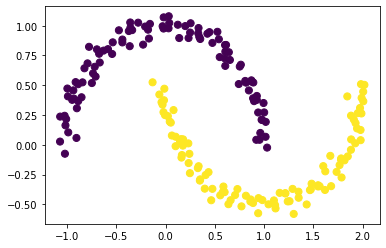

In [5]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y,
            s=50, cmap='viridis');